In [ ]:
In questo esercizio sono state scritte le cifre da 0 a 9 a mano tramite l'applicazione gimp, e sono state poi importate
e caricate per vedere se la rete neurale è in grado di riconoscerle.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Data shape (reshaped for prediction): (10, 28, 28, 1)
1/1 [==============================] - 0s 20ms/step


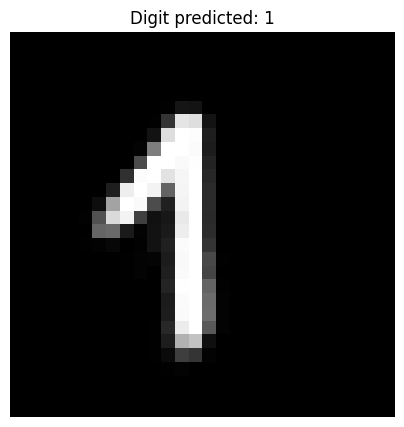

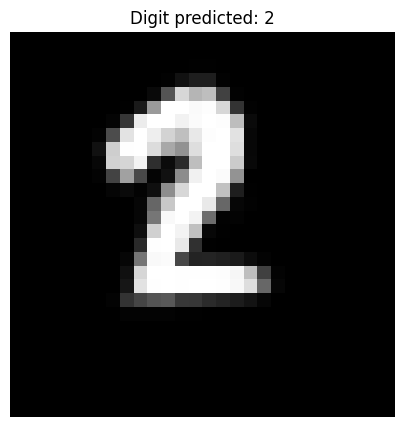

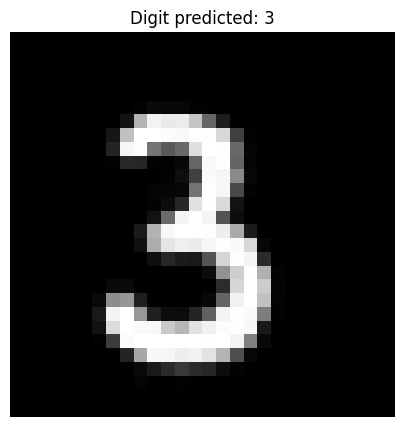

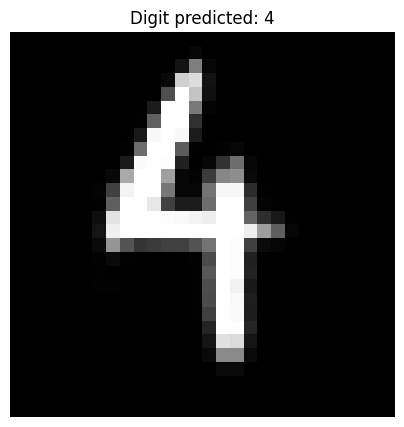

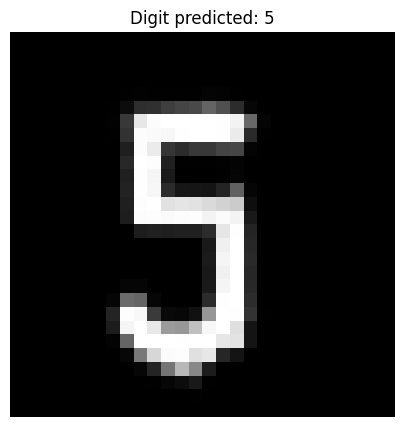

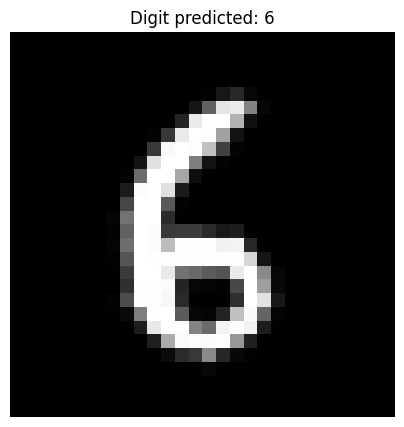

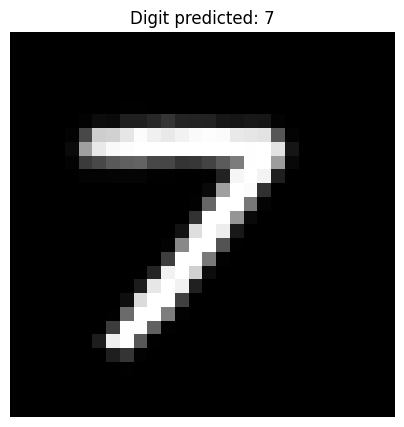

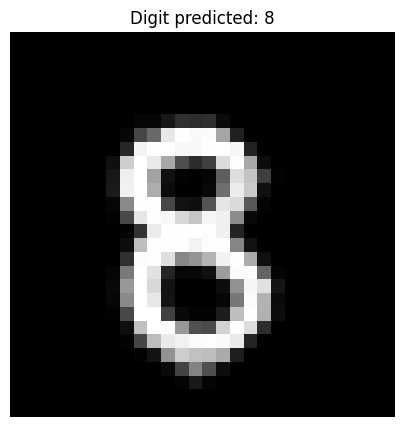

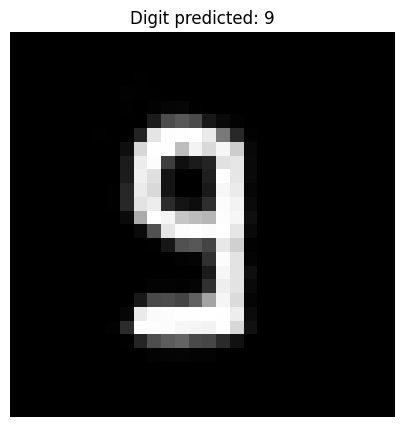

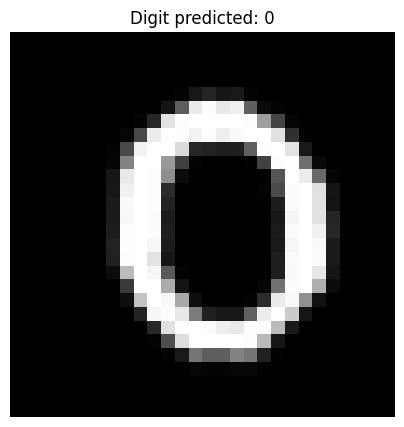

In [4]:
from PIL import Image
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Monta Google Drive
drive.mount('/content/drive')

# Elenco dei percorsi delle immagini
image_filenames = [
    "/content/drive/My Drive/numero 1.png",
    "/content/drive/My Drive/numero 2.png",
    "/content/drive/My Drive/numero 3.png",
    "/content/drive/My Drive/numero 4.png",
    "/content/drive/My Drive/numero 5.png",
    "/content/drive/My Drive/numero 6.png",
    "/content/drive/My Drive/numero 7.png",
    "/content/drive/My Drive/numero 8.png",
    "/content/drive/My Drive/numero 9.png",
    "/content/drive/My Drive/numero 0.png"
]

# Lista per salvare i dati delle immagini
data_list = []

for digit_filename in image_filenames:
    # Carica l'immagine e converti in scala di grigi
    digit_in = Image.open(digit_filename).convert('L')

    # Ottieni le dimensioni dell'immagine (presumiamo che tutte le immagini abbiano le stesse dimensioni)
    xdim, ydim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))

    # Carica i pixel dell'immagine e crea un array numpy
    pix = digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i, j] = pix[i, j]

    # Normalizza i dati
    data /= 255

    # Aggiungi l'immagine alla lista
    data_list.append(data)

# Converti la lista in un array numpy e ridimensiona i dati per la previsione
data_array = np.array(data_list).reshape(len(data_list), xdim, ydim, 1)
print("Data shape (reshaped for prediction):", data_array.shape)

# Esegui la previsione
pred_0 = model_CNN.predict(data_array)

# Visualizza le immagini e le previsioni
for i in range(len(data_list)):
    data = data_list[i].reshape(xdim, ydim)

    plt.figure(figsize=(5, 5))
    plt.imshow(data, cmap='gray')
    plt.title("Digit predicted: {}".format(np.argmax(pred_0[i])))
    plt.axis('off')
    plt.show()
